1. Introduction to RNNs
    1.1. What is Sequential Data?
    Sequential data is any data where the order matters. Examples include:

    Time Series Data: Stock prices, weather data, etc.
    Text Data: Sentences, where each word's meaning can depend on the previous ones.
    Audio Data: Speech signals, where sounds are sequenced over time.
    
    1.2. Limitations of Traditional Neural Networks
    Traditional feedforward neural networks (like Multi-Layer Perceptrons) process inputs independently and cannot capture the dependencies between     different inputs in a sequence. This makes them unsuitable for tasks where context or memory is essential.

Traditional feedforward neural networks (FFNNs) are the most basic type of artificial neural networks. They are called "feedforward" because the information in these networks moves in one direction—from the input layer, through the hidden layers (if any), to the output layer. There are no cycles or loops in the network, distinguishing them from recurrent neural networks (RNNs). Let's delve into the details of FFNNs, starting from the basics and moving toward more complex concepts.

1. Basic Structure of Feedforward Neural Networks
    1.1. Neurons and Layers
    Neuron: The fundamental unit of a neural network. Each neuron receives input, processes it (using a weighted sum and an activation function), and passes the result to the next layer.

    Layers:

    Input Layer: The first layer in the network, which receives the input data. The number of neurons in this layer equals the number of features in the input data.
    Hidden Layers: Intermediate layers between the input and output layers. These layers perform computations on the input data and extract relevant features. A network can have one or multiple hidden layers.
    Output Layer: The final layer, which produces the output. The number of neurons in this layer depends on the task (e.g., for binary classification, there would typically be one output neuron).

    1.2. Forward Pass
    In an FFNN, data moves in one direction: forward through the network. During the forward pass:

    Each neuron in the hidden layers computes a weighted sum of its inputs.
    The weighted sum is passed through an activation function to produce the neuron's output.
    The output from one layer serves as the input to the next layer.
    Finally, the output layer produces the final predictions.

2. Mathematical Formulation
    2.1. Weight and Bias
    Weights (𝑊): Each connection between neurons in adjacent layers has an associated weight. These weights determine the strength and direction (positive or negative) of the influence that one neuron's output has on another neuron's input.
    Bias (𝑏): A bias term is added to the weighted sum of inputs to allow the activation function to shift left or right. This provides the model with additional flexibility.
    2.2. Activation Functions
    The output of each neuron is passed through an activation function, which introduces non-linearity into the model. Common activation functions include:

. Sigmoid:      
                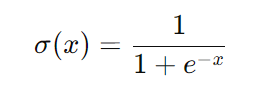

Maps the input to a value between 0 and 1.



. Tanh:
                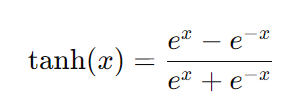

Maps the input to a value between -1 and 1.


. ReLU (Rectified Linear Unit):
                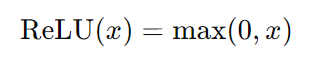

Maps all negative values to 0 and all positive values to the same value.Introduces sparsity by setting negative values to zero and allowing positive values to pass unchanged.

2. Basic Structure of RNNs
    2.1. RNN Architecture
    An RNN is structured to maintain a hidden state that captures information about previous elements in the sequence. The key components are:

    Input Layer: Takes the sequential input.
    Hidden Layer: Processes the input and updates the hidden state.
    Output Layer: Produces the output for the current time step.

At each time step 𝑡:

𝑥𝑡 ​is the input at time step 𝑡.
ℎ𝑡 is the hidden state at time step 𝑡.
𝑦𝑡 is the output at time step 𝑡.

The recurrence relation is given by:

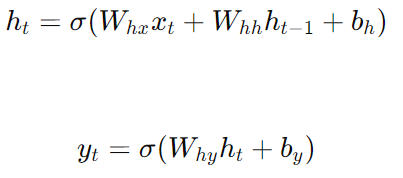

where 𝜎 is an activation function (commonly tanh or ReLU), 𝑊ℎ𝑥,𝑊ℎℎ,𝑊ℎ𝑦​ are weight matrices, and 𝑏ℎ,𝑏𝑦 are biases.

3. Training RNNs
    3.1. Backpropagation Through Time (BPTT)
    Training RNNs involves adjusting the weights based on errors calculated at each time step. However, unlike feedforward networks, RNNs require   Backpropagation Through Time (BPTT), where the gradients are calculated by unfolding the network across time steps. This process considers how each  input influences not only the current output but also future outputs.

    3.2. Challenges in Training RNNs
    Vanishing Gradient Problem: The gradients can shrink exponentially as they are propagated backward, making it difficult to train on long sequences.
    Exploding Gradient Problem: The gradients can grow exponentially, leading to unstable training.

Natural Language Processing (NLP) Repository

This repository serves as a comprehensive guide to Natural Language Processing (NLP), covering various concepts, techniques, and implementations. Each section includes theoretical explanations and practical code examples.

Table of Contents

1.Introduction to NLP
2.Text Preprocessing
3.Feature Extraction
4.Text Classification
5.Named Entity Recognition (NER)
6.Sentiment Analysis
7.Topic Modeling
8.Word Embeddings
9.Language Models
10.Machine Translation
11.Advanced Topics

Introduction to Natural Language Processing (NLP)
Natural Language Processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans using natural language. The ultimate objective of NLP is to read, decipher, understand, and make sense of human languages in a valuable way.

Key Concepts

1.Tokenization: The process of breaking down text into individual words or subwords.
2.Part-of-Speech (POS) Tagging: Assigning grammatical categories (e.g., noun, verb, adjective) to each word in a text.
3.Named Entity Recognition (NER): Identifying and classifying named entities (e.g., person names, organizations, locations) in text.
4.Syntax and Parsing: Analyzing the grammatical structure of sentences.
5.Semantics: Understanding the meaning of words, phrases, and sentences.
6.Pragmatics: Interpreting language in context.

Applications of NLP

.Machine Translation
.Sentiment Analysis
.Text Summarization
.Question Answering Systems
.Chatbots and Virtual Assistants
.Information Retrieval
.Text Classification

Basic NLP Pipeline
A typical NLP pipeline consists of the following steps:

1.Text acquisition
2.Text cleaning and preprocessing
3.Tokenization
4.Feature extraction
5.Model training and evaluation
6.Prediction or inference

In the following sections, we'll explore each of these steps in detail and implement them using popular NLP libraries.

Getting Started with NLTK
NLTK (Natural Language Toolkit) is a leading platform for building Python programs to work with human language data. Let's start with a simple example using NLTK:

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag

text = "Natural language processing is a subfield of artificial intelligence."

# Tokenization
tokens = word_tokenize(text)
print("Tokens:", tokens)

# Part-of-Speech Tagging
pos_tags = pos_tag(tokens)
print("POS Tags:", pos_tags)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\didgostar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\didgostar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


Tokens: ['Natural', 'language', 'processing', 'is', 'a', 'subfield', 'of', 'artificial', 'intelligence', '.']
POS Tags: [('Natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('subfield', 'NN'), ('of', 'IN'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('.', '.')]


This example demonstrates basic tokenization and part-of-speech tagging using NLTK. In the upcoming sections, we'll dive deeper into these concepts and explore more advanced NLP techniques.

Text Preprocessing in NLP

Text preprocessing is a crucial step in NLP that involves cleaning and transforming raw text data into a format suitable for analysis. This process helps to reduce noise in the text and improve the performance of NLP models.
Common Preprocessing Steps

1.Lowercasing: Converting all text to lowercase to ensure consistency.
2.Removing punctuation: Eliminating punctuation marks that may not contribute to the meaning.
3.Removing numbers: Removing numerical digits if they're not relevant to the analysis.
4.Removing whitespace: Stripping extra spaces, tabs, and newlines.
5.Removing stop words: Eliminating common words that don't carry much meaning (e.g., "the", "is", "at").
6.Stemming: Reducing words to their root form (e.g., "running" to "run").
7.Lemmatization: Similar to stemming, but ensures the root word is a valid word (e.g., "better" to "good").
8.Handling contractions: Expanding contractions to their full form (e.g., "don't" to "do not").
9.Removing HTML tags: Cleaning text scraped from websites.
10.Handling emojis and special characters: Deciding whether to remove, replace, or keep these elements.

Preprocessing with NLTK and spaCy
We'll demonstrate text preprocessing using both NLTK and spaCy, two popular NLP libraries in Python.
NLTK Example

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text_nltk(text):
    # Lowercase
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove punctuation and numbers
    tokens = [token for token in tokens if token not in string.punctuation and not token.isdigit()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

# Example usage
text = "The quick brown foxes are jumping over the lazy dogs! They've been doing this for 123 days."
preprocessed_text = preprocess_text_nltk(text)
print(preprocessed_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\didgostar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didgostar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\didgostar\AppData\Roaming\nltk_data...


quick brown fox jump lazi dog 've day


In [8]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):
    doc = nlp(text)
    
    # Tokenize and lemmatize
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_digit]
    
    return ' '.join(tokens)

# Example usage
text = "The quick brown foxes are jumping over the lazy dogs! They've been doing this for 123 days."
preprocessed_text = preprocess_text_spacy(text)
print(preprocessed_text)

ModuleNotFoundError: No module named 'spacy'

In the next sections, we'll explore how to use these preprocessed texts for various NLP tasks such as feature extraction and text classification.

Feature Extraction in NLP
Feature extraction is the process of transforming raw text data into numerical features that can be used by machine learning algorithms. This step is crucial in NLP as it bridges the gap between human-readable text and machine-understandable input.
Common Feature Extraction Techniques

1.Bag of Words (BoW): Represents text as a multiset of words, disregarding grammar and word order.
2.Term Frequency-Inverse Document Frequency (TF-IDF): Reflects the importance of a word in a document within a collection.
3.Word Embeddings: Dense vector representations of words that capture semantic meanings.
4.N-grams: Contiguous sequences of n items from a given text.
5.Part-of-Speech (POS) Features: Grammatical features based on the role of words in sentences.
6.Named Entity Recognition (NER) Features: Features based on identified named entities in the text.
7.Syntactic Features: Based on the syntactic structure of sentences (e.g., dependency parsing).

Implementing Feature Extraction
We'll demonstrate how to implement Bag of Words, TF-IDF, and Word Embeddings using popular Python libraries.


Bag of Words (BoW) with scikit-learn:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample texts
corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "The lazy dog sleeps all day.",
    "The quick brown fox is quick."
]

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the corpus and transform the texts
X = vectorizer.fit_transform(corpus)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Print the BoW representation
print("Bag of Words representation:")
print(X.toarray())
print("Feature names:", feature_names)

TF-IDF with scikit-learn:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample texts (same as before)
corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "The lazy dog sleeps all day.",
    "The quick brown fox is quick."
]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the corpus and transform the texts
X = vectorizer.fit_transform(corpus)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Print the TF-IDF representation
print("TF-IDF representation:")
print(X.toarray())
print("Feature names:", feature_names)

Word Embeddings with Gensim (Word2Vec):

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

# Sample texts (same as before)
corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "The lazy dog sleeps all day.",
    "The quick brown fox is quick."
]

# Tokenize the texts
tokenized_corpus = [word_tokenize(text.lower()) for text in corpus]

# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Get the vector for a specific word
print("Vector for 'fox':", model.wv['fox'])

# Find similar words
print("Words similar to 'quick':", model.wv.most_similar('quick'))

These examples demonstrate how to extract features from text data using different techniques. In the next sections, we'll explore how to use these features for various NLP tasks such as text classification and clustering